## Prototype

The Prototype design pattern is good for when creating new objects requires more resources than you want to use or have available. You can save resources by just creating a **copy** of any existing object that is already in memory.<br><br>

E.g., A file you've downloaded from a server may be large, but since it is already in memory, you could just clone it, and work on the new copy independently of the original.<br><br>

In the Prototype patterns interface, you create a **"static clone method"** that should be implemented by all classes that use the interface. How the clone method is implemented in the concrete class is up to you. You will need to decide whether a shallow or deep copy is required.<br><br>

### New concept
In Python, you have mutable objects such as Lists, Dictionaries, Sets  and any custom Objects. A Shallow copy will create new copies of the objects with new references in memory but the underlying data will point to the same memory location as the original list/object being copied. So changing any elements of a copied list will also affect the original list.

### Terminology
- Prototype Interface: The interface that describes the clone() method.
- Prototype: The Object/Product that implements the Prototype interface.
- Client: The client application that uses and creates the ProtoType.

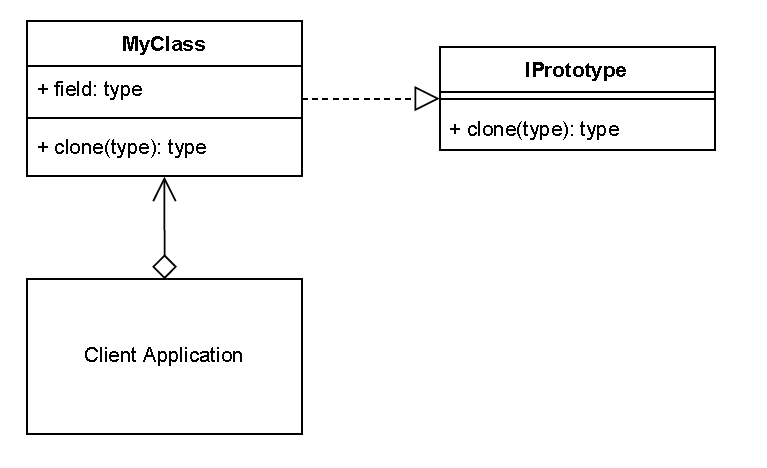

In [1]:
from PIL import Image
Image.open("../prototype.png")

### Source Code

In [12]:
#./prototype/prototype_concept.py

from abc import ABC, abstractmethod

class IProtoType(ABC):
    "Interface with clone method"
    @staticmethod
    @abstractmethod
    def clone():
        """The clone, deep or shallow.
        It's up ti you how you want to implement the details in
        your concrete class.
    """

class MyClass(IProtoType):
    "A Concrete Class"
    def __init__(self,field):
        self.field = field #any value of any type
        
    def clone(self):
        # This clone method uses a shallow copy technique
        return type(self)(self.field) #level1 
                #type(self)(self.field.copy()) level2
                
            # Shallow copy is returned .
            # "self.field.copy()" is also a shallow copy but has also copied the first level of field.
            # So it's essentially a shallow copy but 2 levels deep.  
        
        
    def __str__(self):
        return f"{id(self)}\tfield={self.field}\ttype={type(self.field)}"

In [13]:
OBJECT1=MyClass([1,2,3,4]) # Create the object
print(f"OBJECT1 {OBJECT1}")

OBJECT1 2385942638416	field=[1, 2, 3, 4]	type=<class 'list'>


In [14]:
#Clone
OBJECT2 = OBJECT1.clone()

#Change the value of one of the list element in OBJECT2,
# To see if it also modifies the list element in OBJECT1. 
# If it changed OBJECT1's copy too, then the clone was done suing a 1level shallow copy process.

OBJECT2.field[1]=101

In [15]:
print(f"OBJECT2 {OBJECT2}")
print(f"OBJECT1 {OBJECT1}")

OBJECT2 2385942637216	field=[1, 101, 3, 4]	type=<class 'list'>
OBJECT1 2385942638416	field=[1, 2, 3, 4]	type=<class 'list'>


### Caveat
The 2-level shallow copy only copies collections(list,dictionary,set) one level deep.<br>

In [19]:
a = [1,2,[3,4]]
b = type(a)(a.copy())

In [20]:
b[0] =  5 

print(a)
print(b)
#This doesn't affect a

[1, 2, [3, 4]]
[5, 2, [3, 4]]


In [21]:
# But when you go one level deeper, it's not the case
b[2][0] = 6

print(a)
print(b)

[1, 2, [6, 4]]
[5, 2, [6, 4]]


In [26]:
a = [1,2,[3,4]]
b = a[:] #This is also simple technique to shallow copy two level deep

b[2][1]= 6

print(a)
print(b)
b[0]=5

print(a)
print(b)

[1, 2, [3, 6]]
[1, 2, [3, 6]]
[1, 2, [3, 6]]
[5, 2, [3, 6]]


### Prototype Use Case

In this example, an object called document is cloned using shallow, 2 level shallow, and full recursive deep methods.

In [28]:
#./prototype/interface_prototype.py

from abc import ABC , abstractmethod

class IProtoType(ABC):
    "Interface with clone method"
    @staticmethod
    @abstractmethod
    def clone(mode):
        """The clone, deep, or shallow. """
        
        
import copy

class Document(IProtoType):
    "A Concrete Class"
    def __init__(self,name,l):
        self.name=name
        self.list=l
    
    def clone(self,mode):
        "This clone method uses different copy techniques"
        if mode ==1:
            # 1 level shallow copy 
            doc_list=self.list
        if mode ==2:
            doc_list=self.list.copy()
        if mode ==3:
            doc_list=copy.deepcopy(self.list)
        
        return type(self)(
            self.name, 
            doc_list
            )
    
    def __str__(self):
        return f"{id(self)}\tname={self.name}\tlist={self.list}"


In [29]:
#./prototype/client.py

ORIGINAL_DOCUMENT = Document("Original",[[1,2,3,4],[5,6,7,8]])
print(ORIGINAL_DOCUMENT)

2385946607728	name=Original	list=[[1, 2, 3, 4], [5, 6, 7, 8]]


In [30]:
DOCUMENT_COPY_1 = ORIGINAL_DOCUMENT.clone(1)
DOCUMENT_COPY_1.name = "Copy 1"
#This also modified ORIGINAL_DOCUMENT because it's 1 level deep

DOCUMENT_COPY_1.list[1][2]= 200
print(DOCUMENT_COPY_1)
print(ORIGINAL_DOCUMENT)

2385942671088	name=Copy 1	list=[[1, 2, 3, 4], [5, 6, 200, 8]]
2385946607728	name=Original	list=[[1, 2, 3, 4], [5, 6, 200, 8]]


In [33]:
DOCUMENT_COPY_2=ORIGINAL_DOCUMENT.clone(2) #2 level
DOCUMENT_COPY_2.name = "Copy2"

#This does NOT modify ORIGINAL_DOCUMENT because it changes the list[1] referencec that was deep copied 
#when using mode 2

DOCUMENT_COPY_2.list[1]=[9,10,11,12]
print(DOCUMENT_COPY_2)
print(ORIGINAL_DOCUMENT)

2385942640624	name=Copy2	list=[[1, 2, 3, 4], [9, 10, 11, 12]]
2385946607728	name=Original	list=[[1, 2, 3, 4], [5, 6, 200, 8]]


In [35]:
DOCUMENT_COPY_3 = ORIGINAL_DOCUMENT.clone(2) # Still level 2
DOCUMENT_COPY_3.name = "COPY 3"

DOCUMENT_COPY_3.list[1][0] = "1234"
print(DOCUMENT_COPY_3)
print(ORIGINAL_DOCUMENT)

## This does modify ORIGINAL_DOCUMENT because it changes the element of
# list[1][0] that was NOT deep copied recursively when using mode 2

2385946610608	name=COPY 3	list=[[1, 2, 3, 4], ['1234', 6, 200, 8]]
2385946607728	name=Original	list=[[1, 2, 3, 4], ['1234', 6, 200, 8]]


In [36]:
DOCUMENT_COPY_4 = ORIGINAL_DOCUMENT.clone(3) # deep copy (recursive)
DOCUMENT_COPY_4.name = "Copy 4"

# This does NOT modify ORIGINAL_DOCUMENT because it
# deep copies all levels recursively when using mode 3

DOCUMENT_COPY_4.list[1][0] = "5678"
print(DOCUMENT_COPY_4)
print(ORIGINAL_DOCUMENT)
print()

2385942637408	name=Copy 4	list=[[1, 2, 3, 4], ['5678', 6, 200, 8]]
2385946607728	name=Original	list=[[1, 2, 3, 4], ['1234', 6, 200, 8]]



### New coding concepts

- id() function
    - This returns the memory address of an object
    - All objects in Python will have a memory address
